# Connecting to the Pi

(only verified on Raspberry Pi OS)<br>
SSH is turned off by default. Turn it on through a VNC connection by going top left and then selecting settings.<br>
after turning on ssh, get the ip address of the pi. "hostname -I" should list both a IP4 and IP6 for the pi. <br>
Running "sudo netstat -tuln" and looking at port 22 should tell you which IP the pi is waiting for.<br>
from there running in a windows powershell "ssh pi@DESIREDIPADDRESS" and entering the password "raspberry" should enable a ssh connection.<br>

(Ubuntu Build details)<br>
A majority of setup for the pi will come from modifying the netplan configurations to get WIFI up and running and a SSH connection.<br>

#This file is generated from information provided by the datasource.  Changes <br>
#to it will not persist across an instance reboot.  To disable cloud-init's <br>
#network configuration capabilities, write a file <br>
#/etc/cloud/cloud.cfg.d/99-disable-network-config.cfg with the following: <br>
#network: {config: disabled} <br>
network:<br>
    ethernets:<br>
        eth0:<br>
            dhcp4: true<br>
            optional: true<br>
    version: 2<br>
    wifis:<br>
        wlan0:<br>
            access-points:<br>
                WhiteSky-West20:<br>
                    password: h2hkcf6x<br>
            dhcp4: true<br>
            optional: true<br>
#path is /etc/netplan/50-cloud-init.yaml<br>
#netplan apply<br>

After this is done successfully, the following should be done:<br>
The date and time will be wrong so run:<br>
sudo date -s "$(wget -qSO- --max-redirect=0 google.com 2>&1 | grep Date: | cut -d' ' -f5-8)Z"<br>
We want to update base packages so do:<br>
sudo apt update<br>
sudo apt upgrade<br>
A restart will likely be needed at this point<br>
Next we want to give apt all privliges<br>
sudo chown -Rv _apt:root /var/cache/apt/archives/partial/<br>
sudo chmod -Rv 700 /var/cache/apt/archives/partial/<br>
Then we must get a dependency for WiringPi<br> 
sudo apt install dpkg-dev<br>
<br>
Then follow the instructions for installing WiringPi<br>
https://github.com/WiringPi/WiringPi<br>
with the FOLLOWING MODIFICATIONS:<br>
when moving the .deb move it to /tmp and run it from there<br>
This is done to manage permission details


# Firmware Overview

Our choice of HAL (Hardware Abstraction Layer) library for the rover will be <br>
https://github.com/WiringPi/WiringPi/tree/master.<br>
This library has high quality documentation, runs extremly fast, and works well with ubuntu setups - hence our choice to use it.

# Useful Information to ease coding process
**Terminal commands:**<br>
gpio readall - list the gpio pins and thier states, along with all naming conventions.<br>
**Resources:**
https://github.com/WiringPi/WiringPi/tree/master/examples
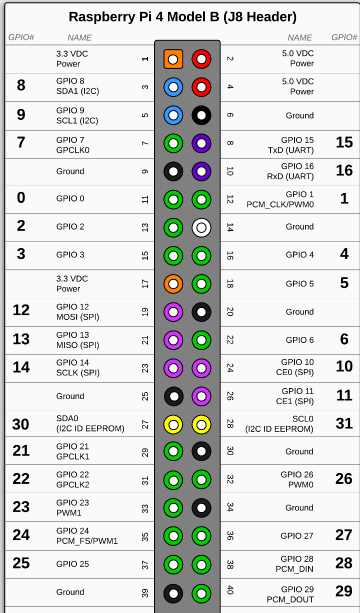<br>
<center>This image provides useful infromation for how wiringpi references GPIO. Bottom of image is close to ethernot on board.</center><br>
<center>**THERE ARE MULTIPLE NAMING CONVENTIONS FOR PINS SO BE VERY CAREFUL WHICH ONE YOU USE**</center><br>
<center>Additionally, ground is not a constant zero for the pi - thus not connecting to ground while probing is...bad. Just spend the time and connect ground</center>

# Getting Things Running
Included in the firmware directory is a setup project. Following the instructions in the read me should provide
a compiled output called "test".<br>
Probing the 12th pin, refered to in the above image as GPIO1, and then connecting to ground should result in a varying pwm cycle.

